# Cleaning the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

## Import Data

This data comes from a survey targeting various roles within the creative industry. It was conducted to help a non-profit organization better serve the community. Each row represents an individual in a creative role based in Nashville, while each column corresponds to a survey question.

In [2]:
data = pd.read_excel("2023-cleaned-survey.xlsx")
data.head()

data.shape

(350, 271)

## Fill Missing Values / Remove Missing Columns

1. Fill data with Na if empty
2. Create a list of column names with almost all missing values
3. Remove columns with missing values

In [3]:
data_filled = data.fillna(np.nan)

def columns_with_many_nans(df, threshold):
    """
    Returns a list of column names in the DataFrame that have more than the specified threshold of NaN values.
    """
    nan_count = df.isnull().sum()
    columns_with_excess_nans = nan_count[nan_count > threshold].index.tolist()
    return columns_with_excess_nans

threshold_start=345

columns_with_excess_nan_values = columns_with_many_nans(data_filled, threshold_start)
columns_with_excess_nan_values

['Role Description as an Arts Educator',
 'Creative Disciplines You Teach',
 'Years of Experience as Arts Educator',
 'Rate Barriers to Success for Artists/Educators Access to affordable creative practice/development space',
 'Rate Barriers to Success for Artists/Educators Access to affordable performance/presentation space',
 'Rate Barriers to Success for Artists/Educators Access to funding',
 'Rate Barriers to Success for Artists/Educators Lack of business management knowledge',
 'Rate Barriers to Success for Artists/Educators No formal undergraduate, graduate, or informal technical skills training in your field',
 'Rate Barriers to Success for Artists/Educators Not enough of an audience for your work',
 'Rate Barriers to Success for Artists/Educators Perceived lack of support from the government (municipal, state)',
 'Rate Barriers to Success for Artists/Educators Perceived lack of support from the private sector/business community',
 'Rate Barriers to Success for Artists/Educators 

In [4]:
# Deleting the columns with excess NaN values
df_cleaned_empty = data_filled.drop(columns_with_excess_nan_values, axis=1)
df_cleaned_empty.shape  # Displaying the first few rows of the cleaned DataFrame

(350, 248)

## Seperate by Role

1. Create a new column called "Primary Role" from "Describe Your Primary Role in Creative Sector"
2. Establish new DataFrames for each role

In [5]:
jobs_df = df_cleaned_empty['Describe Your Primary Role in Creative Sector'].str.split("(").str[0]

df_cleaned_empty['Primary Role'] = jobs_df 


unique_strings = df_cleaned_empty['Primary Role'].unique()
unique_strings

/var/folders/l5/vvgcqs212k1cb47098m4sbm80000gn/T/ipykernel_11031/3383167546.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_cleaned_empty['Primary Role'] = jobs_df


array(['Creative Worker ', 'Arts Administrator ', 'Arts Funder ',
       'Business Professional ', 'Civic and/or Social Service Worker ',
       'Creative Entrepreneurs ', 'Arts Educator or Teaching Artist '],
      dtype=object)

In [6]:
dataframes_dict = {}
unique_roles = df_cleaned_empty['Primary Role'].unique()

for role in unique_roles:
    dataframes_dict[role.strip()] = df_cleaned_empty[df_cleaned_empty['Primary Role'] == role]

# For demonstration, showing the first few rows of the dataframe for 'Creative Worker'
CreativeWorker = dataframes_dict['Creative Worker']
CreativeWorker = pd.DataFrame(CreativeWorker)
print('CreativeWorker:',CreativeWorker.shape)

ArtsAdministrator = dataframes_dict['Arts Administrator']
ArtsAdministrator = pd.DataFrame(ArtsAdministrator)
print('ArtsAdministrator:',ArtsAdministrator.shape)

ArtsFunder = dataframes_dict['Arts Funder']
ArtsFunder = pd.DataFrame(ArtsFunder)
print('ArtsFunder:',ArtsFunder.shape)

BusinessProfessional = dataframes_dict['Business Professional']
BusinessProfessional = pd.DataFrame(BusinessProfessional)
print('BusinessProfessional:',BusinessProfessional.shape)

CivicSocialServiceWorker = dataframes_dict['Civic and/or Social Service Worker']
CivicSocialServiceWorker = pd.DataFrame(CivicSocialServiceWorker)
print('CivicSocialServiceWorker:',CivicSocialServiceWorker.shape)

CreativeEntrepreneurs = dataframes_dict['Creative Entrepreneurs']
CreativeEntrepreneurs = pd.DataFrame(CreativeEntrepreneurs)
print('CreativeEntrepreneurs:',CreativeEntrepreneurs.shape)

ArtsEducator = dataframes_dict['Arts Educator or Teaching Artist']
ArtsEducator = pd.DataFrame(ArtsEducator)
print('ArtsEducator:',ArtsEducator.shape)


CreativeWorker: (50, 249)
ArtsAdministrator: (50, 249)
ArtsFunder: (50, 249)
BusinessProfessional: (50, 249)
CivicSocialServiceWorker: (50, 249)
CreativeEntrepreneurs: (50, 249)
ArtsEducator: (50, 249)


## Remove Missing Columns From New DataFrames

Remove columns with a lot of missing values from the role DataFrame

In [7]:
threshold = 49

#CreativeWorker cleaned empty columns
empty_columns_CreativeWorker = columns_with_many_nans(CreativeWorker, threshold)

CreativeWorker_cleaned_empty = CreativeWorker.drop(empty_columns_CreativeWorker, axis=1).reset_index()
print("Creative Worker Dimension:",CreativeWorker_cleaned_empty.shape)

#ArtsAdministrator cleaned empty columns
empty_columns_ArtsAdministrator = columns_with_many_nans(ArtsAdministrator, threshold)

ArtsAdministrator_cleaned_empty = ArtsAdministrator.drop(empty_columns_ArtsAdministrator, axis=1).reset_index()
print("Arts Administrator Dimension:",ArtsAdministrator_cleaned_empty.shape)

#ArtsFunder cleaned empty columns
empty_columns_ArtsFunder = columns_with_many_nans(ArtsFunder, threshold)

ArtsFunder_cleaned_empty = ArtsFunder.drop(empty_columns_ArtsFunder, axis=1).reset_index()
print("Arts Funder Dimension:",ArtsFunder_cleaned_empty.shape)


#BusinessProfessional cleaned empty columns
empty_columns_BusinessProfessional = columns_with_many_nans(BusinessProfessional, threshold)

BusinessProfessional_cleaned_empty = BusinessProfessional.drop(empty_columns_BusinessProfessional, axis=1).reset_index()
print("Business Professional Dimension:",BusinessProfessional_cleaned_empty.shape)

#CivicSocialServiceWorker cleaned empty columns
empty_columns_CivicSocialServiceWorker = columns_with_many_nans(CivicSocialServiceWorker, threshold)

CivicSocialServiceWorker_cleaned_empty = CivicSocialServiceWorker.drop(empty_columns_CivicSocialServiceWorker, axis=1).reset_index()
print("CivicSocial Service Worker Dimension:",CivicSocialServiceWorker_cleaned_empty.shape)

#CreativeEntrepreneurs cleaned empty columns
empty_columns_CreativeEntrepreneurs = columns_with_many_nans(CreativeEntrepreneurs, threshold)

CreativeEntrepreneurs_cleaned_empty = CreativeEntrepreneurs.drop(empty_columns_CreativeEntrepreneurs, axis=1).reset_index()
print("Creative Entrepreneurs Dimension:",CreativeEntrepreneurs_cleaned_empty.shape)


#ArtsEducator cleaned empty columns
empty_columns_ArtsEducator = columns_with_many_nans(ArtsEducator, threshold)

ArtsEducator_cleaned_empty = ArtsEducator.drop(empty_columns_ArtsEducator, axis=1).reset_index()
print("Arts Educator Dimension:",ArtsEducator_cleaned_empty.shape)


Creative Worker Dimension: (50, 131)
Arts Administrator Dimension: (50, 131)
Arts Funder Dimension: (50, 34)
Business Professional Dimension: (50, 49)
CivicSocial Service Worker Dimension: (50, 30)
Creative Entrepreneurs Dimension: (50, 145)
Arts Educator Dimension: (50, 119)


# 2. Creative Workers, Funders

### 2a. Creative Workers, Arts Administrators: What is the primary arts focus of the organizations and at what distribution? What about funders?

###### Comments:
Creative Worker: The primary arts focus of the orginizations are "all arts, comprehensive."

Arts Administrator: The primary arts focus of the orginizations are "commercial design."

Arts Funder: This group was not asked questions about the primary arts focus of the organizations. 



Top Primary Focus ['All Arts, Comprehensive', 'Jewelry or other Metalworking', 'Craft']
All Arts, Comprehensive                     8
Jewelry or other Metalworking               6
Craft                                       4
Music                                       4
Cultural arts                               4
Visual Art                                  4
Dance                                       4
Commercial Design                           3
Literature                                  3
Fashion or Textiles                         2
Drama, Theater, or other Performance Art    2
Graphic Design                              2
Film/Television                             2
Furniture or Woodworking                    1
Photography                                 1
Name: Primary Creative Focus of Your Organization, dtype: int64


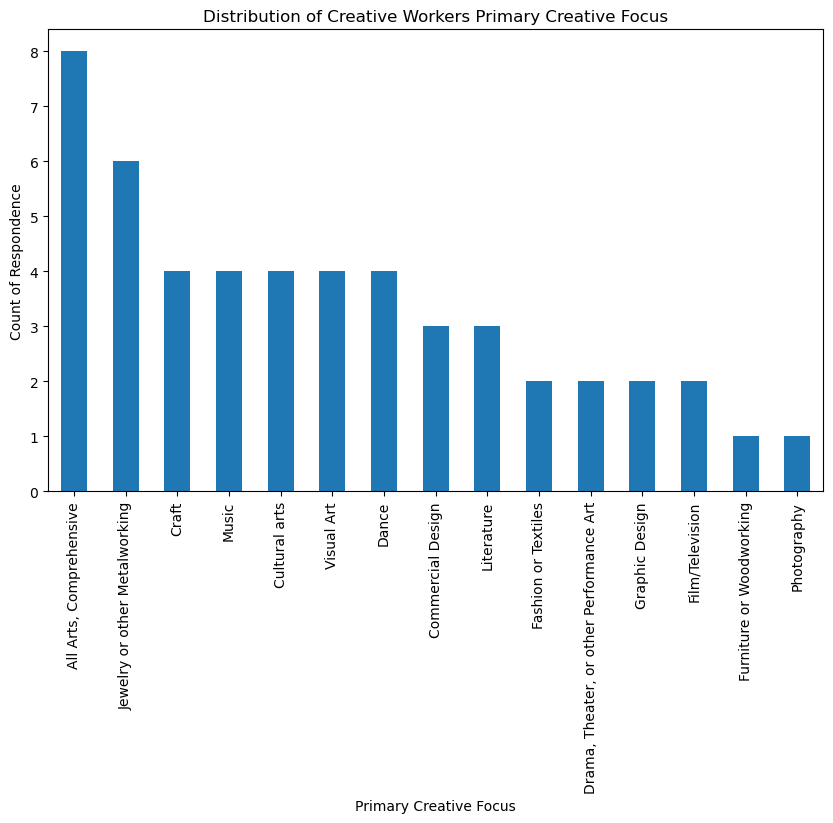

In [8]:


CreativeWorkers_GoalCounts = CreativeWorker["Primary Creative Focus of Your Organization"].value_counts()
CreativeWorkers_GoalCounts = CreativeWorkers_GoalCounts.rename(index={"Commercial Design (Architecture, Industrial, Interior)": "Commercial Design"})

Top_3 = CreativeWorkers_GoalCounts.head(3).index.tolist()
print('Top Primary Focus',Top_3)


print(CreativeWorkers_GoalCounts)

plt.figure(figsize=(10, 6))
CreativeWorkers_GoalCounts.plot(kind='bar')
plt.title('Distribution of Creative Workers Primary Creative Focus')
plt.ylabel('Count of Respondence')
plt.xlabel('Primary Creative Focus')
plt.xticks(rotation=90)  # Optional: rotate x-axis labels for better visibility
plt.show()

This bar graph illustrates the distribution of primary creative focuses among creative workers. It provides a quantitative overview of the diverse areas of interest within the creative community. Notably, the top three primary focuses are arts general, jewlery or other metalwork, and crafts. Each bar represents the count of respondents who selected a particular creative focus, highlighting the predominant areas of interest and specialization.

Top Primary Focus ['Commercial Design', 'Literature', 'Visual Art']


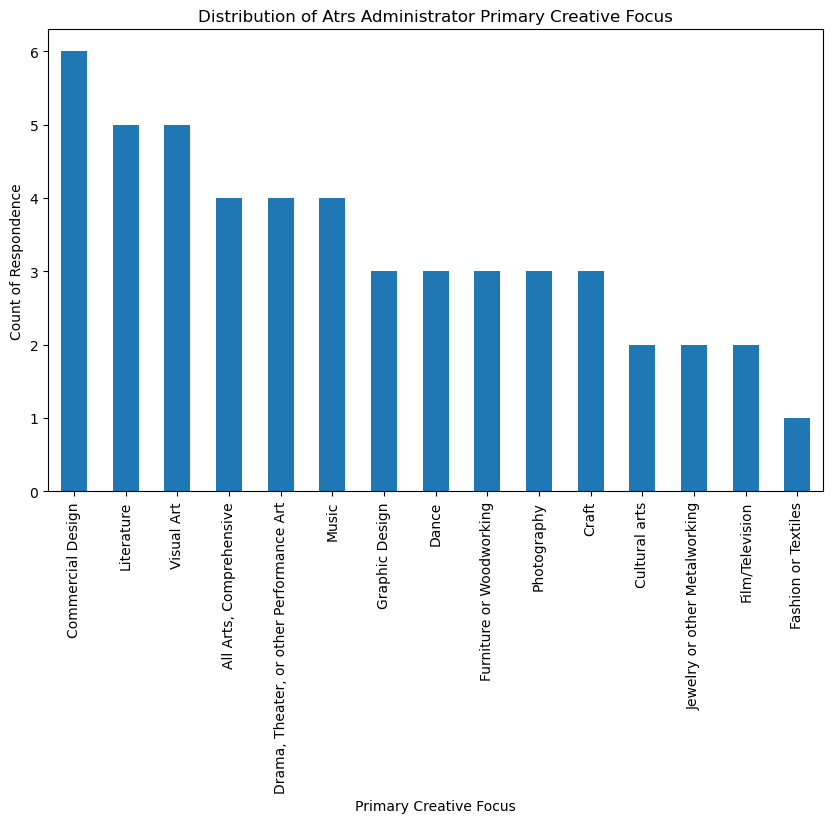

In [9]:


ArtsAdministrator_GoalCounts = ArtsAdministrator_cleaned_empty["Primary Creative Focus of Your Organization"].value_counts()
ArtsAdministrator_GoalCounts = ArtsAdministrator_GoalCounts.rename(index={"Commercial Design (Architecture, Industrial, Interior)": "Commercial Design"})
Top_3 = ArtsAdministrator_GoalCounts.head(3).index.tolist()
print('Top Primary Focus',Top_3)

plt.figure(figsize=(10, 6))
ArtsAdministrator_GoalCounts.plot(kind='bar')
plt.title('Distribution of Atrs Administrator Primary Creative Focus')
plt.ylabel('Count of Respondence')
plt.xlabel('Primary Creative Focus')
plt.xticks(rotation=90)  # Optional: rotate x-axis labels for better visibility
plt.show()


Caption:
This bar graph presents the distribution of primary creative focuses among arts administrators. The data showcases the variety of creative avenues that arts administrators are engaged with. The three most prevalent primary focuses are commercial design, visual art, and literature. Each bar indicates the number of respondents who identified with a specific creative focus, shedding light on the predominant areas of expertise and passion among arts administrators.

### 2b. Creative Workers, Arts Administrators: Provide figures and commentary regarding layoffs and the economic situation for the organization in terms of a) operating budget, and b) layoffs relative to the number of staff members.


#### 2b. Creative Workers

##### Operating budget vs layoffs
1. Organizations with an operating budget of "2,000,001-5,000,000" had the highest percentage (85.71%) of layoffs in 2020.
2. Organizations with a budget of "0-50,000" also had a high percentage (83.33%) of layoffs.
3. On the other hand, organizations with a budget of "50,001-100,000" had the lowest percentage (14.29%) of layoffs.

##### Number of staff members vs layoffs
1. Organizations with a staff count of "1-5" and "More than 50" both had the highest percentage (66.67%) of layoffs in 2020.
2. Organizations with an all-volunteer staff had a percentage of 61.54% for layoffs.
3. Organizations with a staff count of "11-20" had the lowest percentage (28.57%) of layoffs.

In [10]:

CreativeWorkers_Layoffs = CreativeWorker_cleaned_empty["Had Employee Layoffs/Furloughs in 2020"].value_counts()
print(CreativeWorkers_Layoffs)

CreativeWorkers_CurrentStaff = CreativeWorker_cleaned_empty["Current Staff Count in Your Organization"].value_counts()
print(CreativeWorkers_CurrentStaff)

CreativeWorkers_Budget = CreativeWorker_cleaned_empty["Annual Operating Budget of Your Organization"].value_counts()
print(CreativeWorkers_Budget)

CreativeWorkers_Return = CreativeWorker_cleaned_empty["Returned Staff After Layoff/Furlough"].value_counts()
print(CreativeWorkers_Return)

print("_"*100)

CreativeWorkers_LayoffsGroup = CreativeWorker_cleaned_empty.groupby(["Annual Operating Budget of Your Organization","Had Employee Layoffs/Furloughs in 2020"]).agg({"Had Employee Layoffs/Furloughs in 2020": "count"})
CreativeWorkers_LayoffsGroup




Yes    27
No     23
Name: Had Employee Layoffs/Furloughs in 2020, dtype: int64
All Volunteer    13
6-10             10
21-50             8
11-20             7
More than 50      6
1-5               6
Name: Current Staff Count in Your Organization, dtype: int64
$2,000,001-$5,000,000    7
$50,001-$100,000         7
$1,000,000-$2,000,000    7
$100,001-$250,000        6
More than $5,000,000     6
$500,001-$1,000,000      6
$0-$50,000               6
$250,001-$500,000        5
Name: Annual Operating Budget of Your Organization, dtype: int64
All have returned     20
Some have returned    17
None have returned    13
Name: Returned Staff After Layoff/Furlough, dtype: int64
____________________________________________________________________________________________________


Had Employee Layoffs/Furloughs in 2020
Annual Operating Budget of Your Organization Had Employee Layoffs/Furloughs in 2020                                        
$0-$50,000                                   No                                                                           1
                                             Yes                                                                          5
$1,000,000-$2,000,000                        No                                                                           3
                                             Yes                                                                          4
$100,001-$250,000                            No                                                                           3
                                             Yes                                                                          3
$2,000,001-$5,000,000                        No                                                                           1
                                             Yes                                                                          6
$250,001-$500,000                            No                                                                           2
                                             Yes                                                                          3
$50,001-$100,000                             No                                                                           6
                                             Yes                                                                          1
$500,001-$1,000,000                          No                                                                           3
                                             Yes                                                                          3
More than $5,000,000                         No                                                                           4
                                             Yes                                                                          2

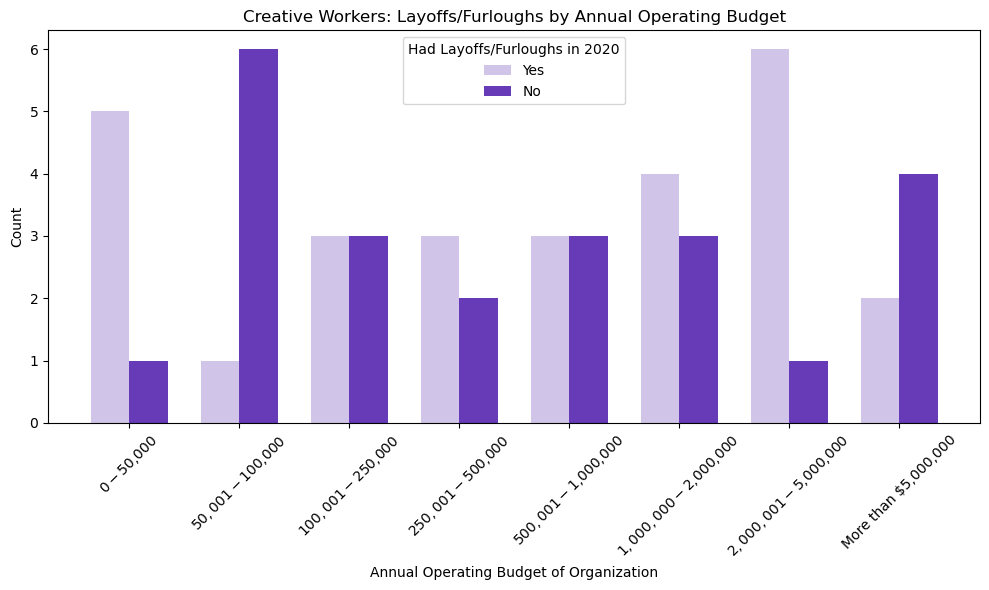

In [11]:


unstacked_data = CreativeWorkers_LayoffsGroup.unstack()

def budget_key(budget_str):
    if budget_str == "More than $5,000,000":
        return float('inf')  # This will ensure this category is always last
    return int(budget_str.split('-')[0].replace('$', '').replace(',', '').strip())

# Sort the DataFrame by the index using the key
unstacked_data = unstacked_data.sort_index(key=lambda x: x.map(budget_key))

# Set up the bar positions
bar_width = 0.35
index = np.arange(len(unstacked_data.index))

# Plotting
fig, ax = plt.subplots(figsize=(10,6))

# Bars for 'Yes' to Layoffs/Furloughs
bar1 = ax.bar(index, unstacked_data[('Had Employee Layoffs/Furloughs in 2020', 'Yes')], bar_width, label='Yes', color='#D1C4E9')

# Bars for 'No' to Layoffs/Furloughs (or other categories)
bar2 = ax.bar(index + bar_width, unstacked_data[('Had Employee Layoffs/Furloughs in 2020', 'No')], bar_width, label='No', color='#673AB7')

# Labeling and presentation
ax.set_xlabel('Annual Operating Budget of Organization')
ax.set_ylabel('Count')
ax.set_title('Creative Workers: Layoffs/Furloughs by Annual Operating Budget')
ax.set_xticks(index + bar_width / 2)  # Positioning the x-axis labels in the center of grouped bars
ax.set_xticklabels(unstacked_data.index, rotation=45)
ax.legend(title='Had Layoffs/Furloughs in 2020')
plt.tight_layout()
plt.show()



Caption:
This bar graph visualizes the relationship between the annual operating budgets of organizations and the occurrence of layoffs or furloughs among creative workers in 2020. Each grouped bar represents an annual budget category, with different colors indicating whether layoffs or furloughs took place. The chart provides insights into the financial thresholds at which organizations were more or less likely to have had staffing disruptions during the year. The legend differentiates between organizations that experienced layoffs/furloughs and those that did not.

In [12]:
# Group data by operating budget and whether they had layoffs
budget_grouped = CreativeWorker_cleaned_empty.groupby(['Annual Operating Budget of Your Organization', 'Had Employee Layoffs/Furloughs in 2020']).size().unstack().fillna(0)

# Calculate percentages of organizations that had layoffs within each budget range
budget_grouped['Percentage with Layoffs'] = (budget_grouped['Yes'] / (budget_grouped['Yes'] + budget_grouped['No'])) * 100

budget_grouped_sorted = budget_grouped.sort_values('Percentage with Layoffs', ascending=False)

budget_grouped_sorted

Had Employee Layoffs/Furloughs in 2020,No,Yes,Percentage with Layoffs
Annual Operating Budget of Your Organization,,,
"$2,000,001-$5,000,000",1,6,85.714286
"$0-$50,000",1,5,83.333333
"$250,001-$500,000",2,3,60.000000
"$1,000,000-$2,000,000",3,4,57.142857
"$100,001-$250,000",3,3,50.000000
"$500,001-$1,000,000",3,3,50.000000
"More than $5,000,000",4,2,33.333333
"$50,001-$100,000",6,1,14.285714


1. Organizations with an operating budget of "2,000,001-5,000,000" had the highest percentage (85.71%) of layoffs in 2020.
2. Organizations with a budget of "0-50,000" also had a high percentage (83.33%) of layoffs.
3. On the other hand, organizations with a budget of "50,001-100,000" had the lowest percentage (14.29%) of layoffs.

In [13]:
# Group data by current staff count and whether they had layoffs
staff_grouped = CreativeWorker_cleaned_empty.groupby(["Current Staff Count in Your Organization", layoffs_column]).size().unstack().fillna(0)

# Calculate percentages of organizations that had layoffs within each staff count category
staff_grouped['Percentage with Layoffs'] = (staff_grouped['Yes'] / (staff_grouped['Yes'] + staff_grouped['No'])) * 100

staff_grouped_sorted = staff_grouped.sort_values('Percentage with Layoffs', ascending=False)

staff_grouped_sorted

NameError: name 'layoffs_column' is not defined

1. Organizations with a staff count of "1-5" and "More than 50" both had the highest percentage (66.67%) of layoffs in 2020.
2. Organizations with an all-volunteer staff had a percentage of 61.54% for layoffs.
3. Organizations with a staff count of "11-20" had the lowest percentage (28.57%) of layoffs.

In [ ]:


# Group the data based on the columns
grouped_data = CreativeWorker_cleaned_empty.groupby([ "Current Staff Count in Your Organization","Had Employee Layoffs/Furloughs in 2020"]).size().unstack()

# Plot the grouped bar graph
plt.figure(figsize=(12, 7))
grouped_data.plot(kind="bar", ax=plt.gca())
plt.title("Creative Workers: Count Had Employee Layoffs/Furloughs in 2020")
plt.ylabel("Count")
plt.xlabel("Current Staff Count of an Organization")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Caption:
This bar graph provides a comprehensive look into the impact of the 2020 events on creative workers, based on the size of their organizations. Each bar cluster represents an organization's current staff count category. Within each cluster, the bars display the number of organizations that either did or did not experience employee layoffs or furloughs in 2020. The visualization underscores how organizations of different sizes responded to the challenges of 2020 in terms of staffing decisions.

In [ ]:
# Check unique values in "Annual Operating Budget of Your Organization" column
budget_column = "Annual Operating Budget of Your Organization"
unique_budgets = CreativeWorker_cleaned_empty[budget_column].unique()

unique_budgets


###### Arts Administrators

##### Operating budget vs layoffs
1. Organizations with a budget range of 50,001-100,000 had the highest percentage of layoffs at 83.3%.
2. Conversely, organizations in the 100,001-250,000 range had the lowest percentage of layoffs at 33.3%.

##### Number of staff members vs layoffs
1. Organizations with a staff count range of "6-10" had the highest percentage of layoffs at 63.6%.
2. Conversely, organizations in the "11-20" range had the lowest percentage of layoffs at 14.3%.

In [ ]:


ArtsAdministrator_Layoffs = ArtsAdministrator_cleaned_empty["Had Employee Layoffs/Furloughs in 2020"].value_counts()
print(ArtsAdministrator_Layoffs)

ArtsAdministrator_CurrentStaff = ArtsAdministrator_cleaned_empty["Current Staff Count in Your Organization"].value_counts()
print(ArtsAdministrator_CurrentStaff)

ArtsAdministrator_Budget = ArtsAdministrator_cleaned_empty["Annual Operating Budget of Your Organization"].value_counts()
print(ArtsAdministrator_Budget)

ArtsAdministrator_Return = ArtsAdministrator_cleaned_empty["Returned Staff After Layoff/Furlough"].value_counts()
print(ArtsAdministrator_Return)



In [ ]:
print("_"*100)

# Defining a custom order for the x-axis (this can be modified based on the actual categories in your data)
budget_order = ['$0-$50,000','$50,001-$100,000','$100,001-$250,000','$250,001-$500,000','$500,001-$1,000,000','$1,000,000-$2,000,000','$2,000,001-$5,000,000','More than $5,000,000']

# Sorting the dataframe using the budget_key function
ArtsAdministrator_cleaned_empty['budget_order'] = ArtsAdministrator_cleaned_empty['Annual Operating Budget of Your Organization'].apply(budget_key)
ArtsAdministrator_cleaned_empty = ArtsAdministrator_cleaned_empty.sort_values('budget_order')

# Group by the specified columns and then unstack
grouped_data = ArtsAdministrator_cleaned_empty.groupby(['Annual Operating Budget of Your Organization', 'Had Employee Layoffs/Furloughs in 2020']).size().unstack().fillna(0)

# Plotting
grouped_data.plot(kind='bar', figsize=(12, 7))
plt.xlabel('Annual Operating Budget of an Organization')
plt.ylabel('Count')
plt.title('Arts Administrator: Operating Budget and Layoffs/Furloughs in 2020')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Had Layoffs/Furloughs in 2020')
plt.show()


Caption:
This bar graph depicts the correlation between the annual operating budgets of organizations and the layoffs or furloughs of arts administrators in 2020. Each bar represents a specific budget range, with different segments indicating the number of organizations that did or did not conduct layoffs or furloughs. The chart offers a perspective on how financial capacity, as indicated by the operating budget, influenced staffing decisions during the challenges of 2020.

In [ ]:
# Creating a cross-tabulation between the two specified columns
contingency_table = pd.crosstab(ArtsAdministrator_cleaned_empty['Annual Operating Budget of Your Organization'],
                                ArtsAdministrator_cleaned_empty['Had Employee Layoffs/Furloughs in 2020'],
                                margins=True, margins_name="Total")

contingency_table



# Converting the 'Total' row values to percentages
contingency_table_percentage = contingency_table.copy()
for column in contingency_table_percentage.columns[:-1]:
    contingency_table_percentage[column] = (contingency_table_percentage[column] / contingency_table_percentage['Total']) * 100

# Rounding the percentages to 2 decimal places
contingency_table_percentage = contingency_table_percentage.round(2)

contingency_table_percentage

# Calculate the percentage with layoffs for each budget range
contingency_table['Percentage with Layoffs'] = (contingency_table['Yes'] / contingency_table['Total']) * 100

# Keeping only the relevant columns for clarity
percentage_table = contingency_table[['Yes', 'Total', 'Percentage with Layoffs']]
percentage_table


1. Organizations with a budget range of 50,001-100,000 had the highest percentage of layoffs at 83.3%.
2. Conversely, organizations in the 100,001-250,000 range had the lowest percentage of layoffs at 33.3%.

In [ ]:
# Defining custom order for the staff count categories
custom_order = ["1-5", "6-10", "11-20", "21-50", "More than 50", "All Volunteer"]

# Plotting the vertical distribution of Current Staff Count in Organizations with custom order and grouped by Layoffs/Furloughs status
plt.figure(figsize=(12, 8))
sns.countplot(x=ArtsAdministrator_cleaned_empty['Current Staff Count in Your Organization'], hue=ArtsAdministrator_cleaned_empty['Had Employee Layoffs/Furloughs in 2020'], order=custom_order)
plt.title('Arts Administrator: Distribution of Current Staff Count Grouped by Layoffs/Furloughs Status in 2020', fontsize=16)
plt.ylabel('Number of Organizations', fontsize=14)
plt.xlabel('Staff Count Range', fontsize=14)
plt.legend(title="Had Layoffs/Furloughs in 2020", loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Caption:
This visualization provides a detailed breakdown of the staffing situations among arts administrator organizations in relation to the layoffs or furloughs they experienced in 2020. The x-axis represents various staff count ranges, from small teams to all-volunteer organizations. Each bar cluster reflects a specific staff count category, and within each cluster, the distinct bars indicate the number of organizations that either encountered or avoided layoffs or furloughs. The chart reveals insights into how different-sized organizations navigated the staffing challenges presented in 2020.

In [ ]:
# Creating a cross-tabulation between "Current Staff Count in Your Organization" and "Had Employee Layoffs/Furloughs in 2020"
staff_contingency_table = pd.crosstab(ArtsAdministrator_cleaned_empty['Current Staff Count in Your Organization'],
                                      ArtsAdministrator_cleaned_empty['Had Employee Layoffs/Furloughs in 2020'],
                                      margins=True, margins_name="Total")

# Calculate the percentage with layoffs for each staff count range
staff_contingency_table['Percentage with Layoffs'] = (staff_contingency_table['Yes'] / staff_contingency_table['Total']) * 100

# Keeping only the relevant columns for clarity
staff_percentage_table = staff_contingency_table[['Yes', 'Total', 'Percentage with Layoffs']]
staff_percentage_table

1. Organizations with a staff count range of "6-10" had the highest percentage of layoffs at 63.6%.
2. Conversely, organizations in the "11-20" range had the lowest percentage of layoffs at 14.3%.